In [41]:
from datetime import date
import statistics

import pandas as pd

In [2]:
repos = pd.read_csv("../variable_collection/output/repositories_filtered_2021-05-20.csv")
how_fair_is = pd.read_csv("../variable_collection/output/repositories_howfairis.csv")
languages = pd.read_csv("../variable_collection/output/languages_2021-05-22.csv")
contributors = pd.read_csv("../variable_collection/output/contributors_2021-05-22.csv")

## Datasets

In [35]:
repos.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,months_ago_most_recent_commit
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,NaN,[],0,0,0,master,NaN,1.0,8
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,0,NaN,[],0,0,2,master,NaN,1.0,22
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,0,MIT License,[],0,0,1,master,NaN,1.0,13
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,NaN,[],0,0,0,master,NaN,1.0,43
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,NaN,[],0,0,0,master,NaN,1.0,29


In [34]:
how_fair_is.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,watchers,default_branch,permissions,score,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,how_fair_sum_scores
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,master,NaN,1.0,True,False,False,False,False,1
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,2,master,NaN,1.0,True,False,False,False,False,1
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,1,master,NaN,1.0,True,True,False,False,False,2
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,master,NaN,1.0,True,False,False,False,False,1
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,master,NaN,1.0,True,False,False,False,False,1


In [5]:
languages.head()

,html_url_repository,language,num_chars
0,https://github.com/M-thieu/fastlogitME,R,9917
1,https://github.com/bricker0/Seattle-Feature-Se...,HTML,7296
2,https://github.com/bricker0/MyLocation,Swift,22906
3,https://github.com/bricker0/Leaflet_2017,HTML,5028
4,https://github.com/bricker0/BasicWebsite,CSS,922


In [6]:
contributors.head()

,html_url_repository,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,contributions
0,https://github.com/M-thieu/fastlogitME,M-thieu,20308204,MDQ6VXNlcjIwMzA4MjA0,https://avatars.githubusercontent.com/u/203082...,NaN,https://api.github.com/users/M-thieu,https://github.com/M-thieu,https://api.github.com/users/M-thieu/followers,https://api.github.com/users/M-thieu/following...,https://api.github.com/users/M-thieu/gists{/gi...,https://api.github.com/users/M-thieu/starred{/...,https://api.github.com/users/M-thieu/subscript...,https://api.github.com/users/M-thieu/orgs,https://api.github.com/users/M-thieu/repos,https://api.github.com/users/M-thieu/events{/p...,https://api.github.com/users/M-thieu/received_...,User,False,3
1,https://github.com/bricker0/Seattle-Feature-Se...,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,15
2,https://github.com/bricker0/choropleth_map,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,46
3,https://github.com/bricker0/Live_Earthquake_Feed,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,1
4,https://github.com/bricker0/MyLocation,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,2


In [7]:
print("The repository data from Github contains the following columns:")
print(repos.columns)

The repository data from Github contains the following columns:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_i

## Different licenses 
The most common one is MIT license, followed by GNU General Public license.  


In [8]:
#licences
repos["license"].value_counts().plot(kind='bar')

In [9]:
percentage_license = int(repos["license"].isna().value_counts()[1]/len(repos)* 100)
print("{} % of repositories have any kind of license on their page ".format(percentage_license))

47 % of repositories have any kind of license on their page 


## Open Science

In [10]:
open_count = 0
for description in repos["description"]:
    #print(str(description).lower())
    if "open" in str(description).lower():
        print(description)
        open_count +=1
print("{} repositories contain the word 'open', often related to either open data or open source projects".format(open_count))

Here I explain how to call Seattle Open Data Esri REST Feature Services using Leaflet
Here is a list of open data sources that are of interest to me
Rstudio project template and convenience functions for the Workflow     for Open Reproducible Code in Science (WORCS)
Unofficial Statistics Netherlands (CBS) opendata API client for Python
Open Source in the public sector in the Netherlands
Scripts for paper: 'ASReview: Open Source Software for Efficient and Transparent Active Learning for Systematic Reviews'
API for opensource-spraakherkenning.nl
Repository for the Interest Group on Linked Open Data
Tools for interacting with OpenLink Virtuoso Open Source edition
open files for buffered reading and writing in #golang
Scripts for simulations and analysis of the influence of tidal currents on microplastic transport in the global open ocean
Creating grid visualisations of dataset examples with the OpenCV library
Open source game of D&D.
Files used to extract event data from BORIS without nee

## Languages

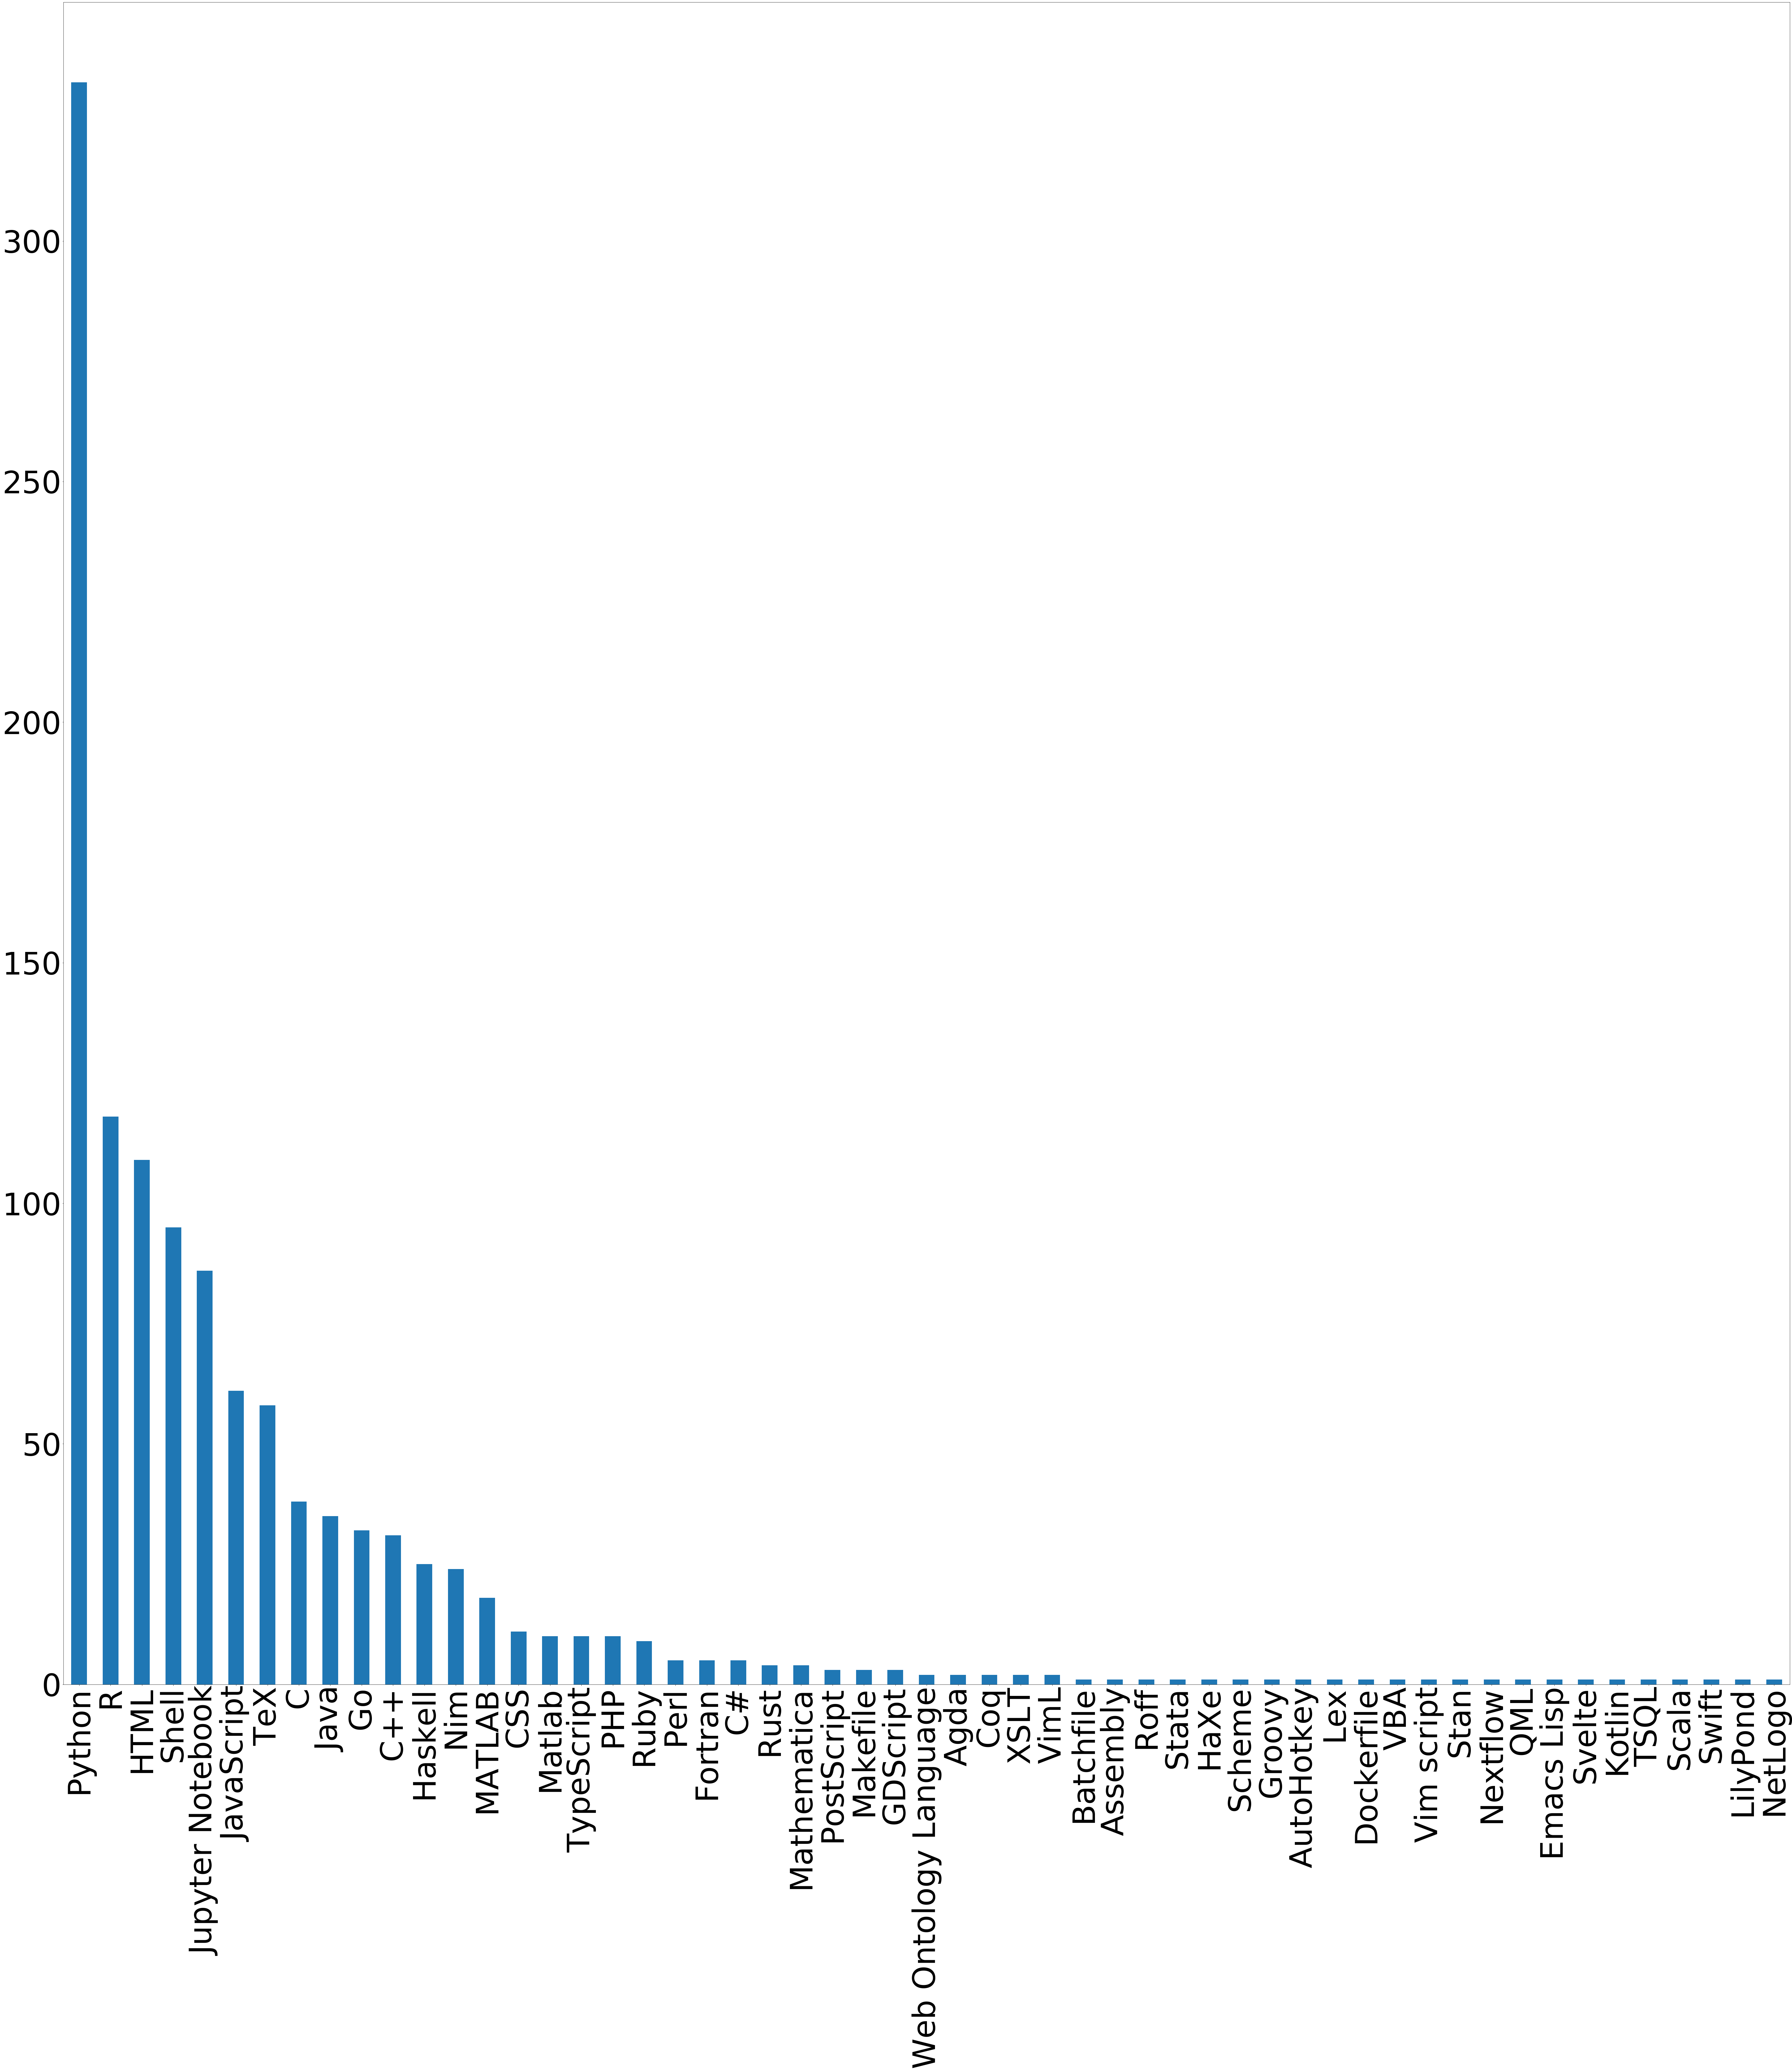

In [11]:
repos["language"].value_counts().plot(kind='bar', figsize = (100,100), fontsize = 100)

In [12]:
from collections import Counter 

topic_counter = Counter()
for topics in repos['topics']:
    
    topics = eval(topics)
    if len(topics) > 0:
        #print(topics)
        for topic in topics:
            #print(topic)
            topic_counter[topic] += 1


In [13]:
topic_counter.most_common()

[('genomics', 26),
 ('utrecht-university', 20),
 ('python', 19),
 ('yoda', 16),
 ('bioinformatics', 15),
 ('stan', 15),
 ('irods', 11),
 ('nim-lang', 11),
 ('php', 10),
 ('james-server', 10),
 ('r', 9),
 ('r-package', 9),
 ('machine-learning', 8),
 ('codeigniter', 8),
 ('nim', 8),
 ('bayesian', 8),
 ('growth-curves', 8),
 ('fiji-plugin', 7),
 ('growth-charts', 7),
 ('asreview', 6),
 ('bayesian-data-analysis', 6),
 ('anthropometry', 6),
 ('plotting', 5),
 ('golang', 5),
 ('dataset', 5),
 ('netherlands', 5),
 ('systematic-reviews', 5),
 ('dutch', 5),
 ('vcf', 5),
 ('structural-variation', 5),
 ('high-throughput-sequencing', 5),
 ('microscopy', 5),
 ('imagej', 5),
 ('imagej-plugins', 5),
 ('bayesian-inference', 5),
 ('bayesian-statistics', 5),
 ('mcmc', 5),
 ('mice', 5),
 ('nodejs', 5),
 ('eida', 5),
 ('visualization', 4),
 ('plot', 4),
 ('python-library', 4),
 ('record-linkage', 4),
 ('entity-resolution', 4),
 ('deduplication', 4),
 ('open-data', 4),
 ('deep-learning', 4),
 ('systematic-

## number of contributors


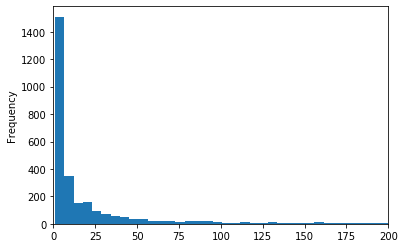

In [14]:
contributors['contributions'].plot(kind = 'hist', xlim = (0, 200), bins = 1000)


In [15]:
print('maximum contributors: '+ str(max(contributors['contributions'])))
print('mean contributors: ' + str(statistics.mean(contributors['contributions'])))
print('median contributors: ' + str(statistics.median(contributors['contributions'])))

maximum contributors: 5532
mean contributors: 52.82843472317157
median contributors: 6.0


## most recent commits 

In [17]:
months_ago_most_recent_commit =[]
today = str(date.today())
split_today = today.split('-')
for date_item in repos['updated_at']:
    split_date = date_item.split('-')
    years_ago = int(split_today[0]) - int(split_date[0])
    months_ago = 12 * years_ago + (int(split_today[1]) - int(split_date[1]))
    months_ago_most_recent_commit.append(months_ago)

In [18]:
repos['months_ago_most_recent_commit'] = months_ago_most_recent_commit

In [19]:
repos.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,months_ago_most_recent_commit
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,NaN,[],0,0,0,master,NaN,1.0,8
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,0,NaN,[],0,0,2,master,NaN,1.0,22
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,0,MIT License,[],0,0,1,master,NaN,1.0,13
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,NaN,[],0,0,0,master,NaN,1.0,43
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,NaN,[],0,0,0,master,NaN,1.0,29


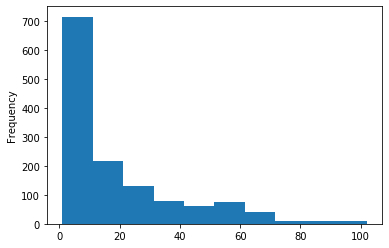

In [20]:
repos['months_ago_most_recent_commit'].plot(kind = 'hist') #Add x-axis months ago

## Howfairis correlations

In [29]:
how_fair_sum_scores = []
for index, row in how_fair_is.iterrows():
    how_fair_is_sum = row['howfairis_repository'] + row['howfairis_license'] +row['howfairis_registry'] + row['howfairis_citation'] + row['howfairis_checklist']
    how_fair_sum_scores.append(how_fair_is_sum)

In [31]:
how_fair_is['how_fair_sum_scores'] = how_fair_sum_scores

In [38]:
correlation_df = pd.DataFrame()

In [39]:
correlation_df['how_fair_sum_scores'] = how_fair_sum_scores
correlation_df['contributions']= contributors['contributions']
correlation_df['months_ago_most_recent_commit'] = repos['months_ago_most_recent_commit']

In [40]:
correlation_df.corr(method='pearson')

,how_fair_sum_scores,contributions,months_ago_most_recent_commit
how_fair_sum_scores,1.000000,0.005683,-0.234263
contributions,0.005683,1.000000,0.025359
months_ago_most_recent_commit,-0.234263,0.025359,1.000000


## Binary correlation plot between howfairis variables

## Programming language and Howfairis

Different programming languages need different licences. For some languages (e.g. python), these are more complex. How does this influence the HowFairis score?

## Analysis of high howfairis scores 

Per language
Per low/high contributors
Check out github pages manually as well 
How to translate pages that do well to concrete tips and advice 

## Re-use of other projects and articles

Are there competitors?
How do they relate to each other?

In [ ]:
presentatie
- 15 minuten
- + 5 minuten vragen 

-wat is het project
-methode?
-wat willen we doen?
-paar graphs met informatie 
-open einde -> nog niet klaar